# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [4]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


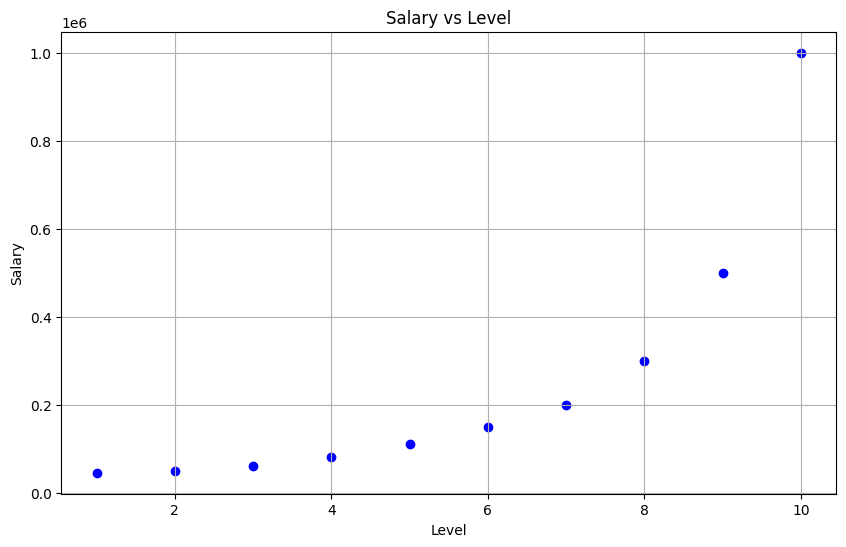

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Level'], data['Salary'], color='blue')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * It will cause underfitting, since data is non linear



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

Predicted Salary for level 7.5: $328672.35


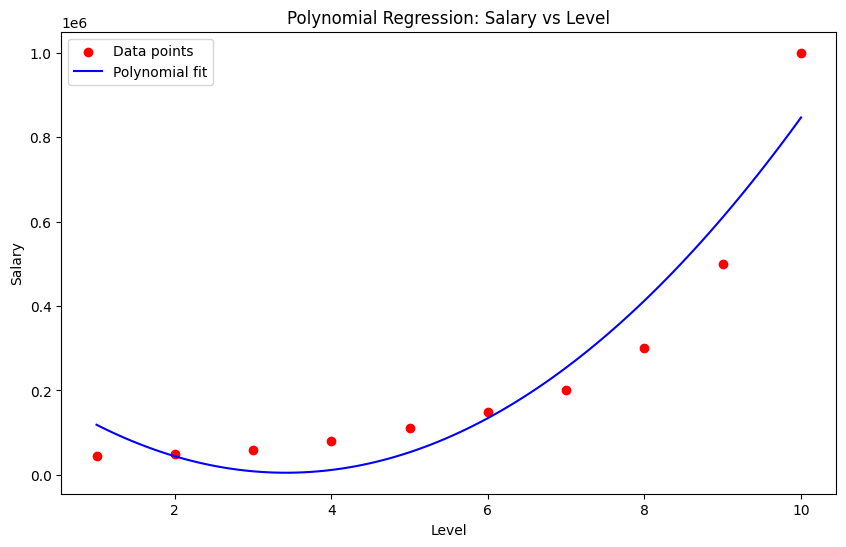

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))


coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2


level_new = 7.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data points')
x_range = np.linspace(min(X), max(X), 100)
plt.plot(x_range, poly_model(x_range), color='blue', label='Polynomial fit')
plt.title('Polynomial Regression: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()


### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * There are no major outliers
> * works for polynomial linear regression

**Derivatives of cost function:**
$$Your \; answer$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$your\;answer$$

## Implementation of the model

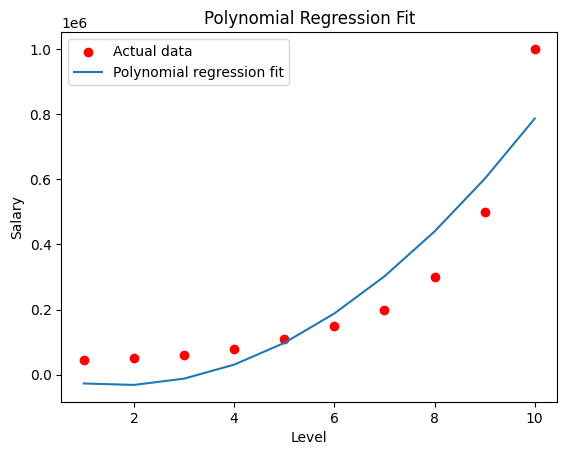

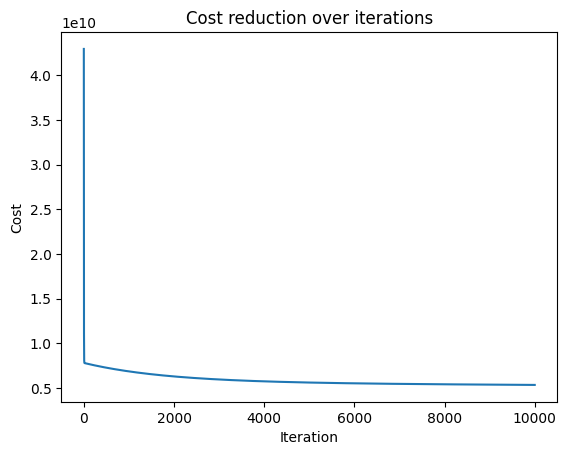

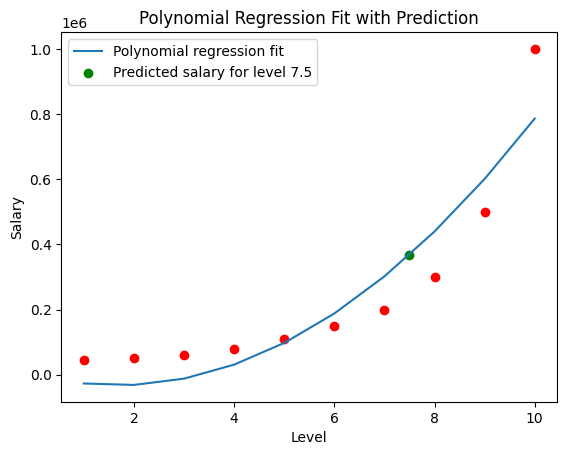

Predicted Salary for level 7.5: $367,915.23
Final cost after optimization: 5337973851.06


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """Calculates y_pred = b + w1*x + w2*x^2"""
    return np.dot(x, coefficients)

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """Computes the mean squared error cost"""
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    return (1/(2*n)) * np.sum((y_pred - y) ** 2)

# Function to calculate the derivatives
def derivatives(X, y, coefficients):
    """Computes the derivatives of the MSE cost function"""
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    return (1/n) * np.dot(X.T, (y_pred - y))

# Gradient Descent function to minimize the cost function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """Performs gradient descent to learn coefficients"""
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data = pd.read_csv("Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model with the data given
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()

# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

# Estimate the model performance
final_cost = compute_cost(X_poly, y, coefficients)
print(f"Final cost after optimization: {final_cost:.2f}")


### Answer the following

* What is learning rate?
> * learning rate controls the size of the steps taken during the optimization process in gradient descent
* What will happen if the learning rate is too large?
> * the step size will become large
> * it will go past the lowest point and cause algorithm to oscillate back and forth around minimum point
> * else it may cause divergence 
* What will happen if the learning rate is too small?
> * the step size will be too small
> * prevents divergence and overshooting the minimum
> * it takes larger number of iterations to reach minimum and more time
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Add a column for the cubic power of x to the matrix X_poly
> * Adjust the polynomial regression model function to include the cubic term.
> * Update the coefficients initialization np.zeros arguments to 4 to include additional terms.

In [ ]:

X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2, X**3))  # Add cubic term X**3

# Update Model Function
def polynomial_regression(x, coefficients):
    """Calculates y_pred = b + w1*x + w2*x^2 + w3*x^3"""
    return np.dot(x, coefficients)
 

coefficients = np.zeros(4)  # Update to accommodate the cubic term
